#Simple and Multiple linear regression

In [0]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Importing the dataset
data = pd.read_csv("Advertising.csv", index_col=0)
data.head()

/content


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## TV Simple Linear Model

In [0]:
x = data.iloc[:,0].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

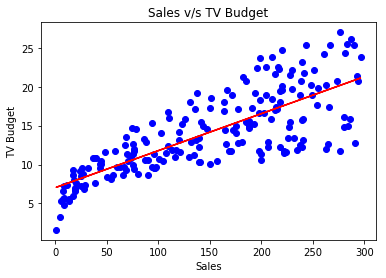

In [0]:
# create an empty linear regression model 
tv_model = LinearRegression()

# to create the model, we use fit(x,y)
tv_model.fit(x,y)

y_pred = tv_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,tv_model.predict(x),color = 'r')
plt.title('Sales v/s TV Budget')
plt.xlabel('Sales')
plt.ylabel('TV Budget')
plt.show()


## Radio Simple Linear Model

In [0]:
x = data.iloc[:,1].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

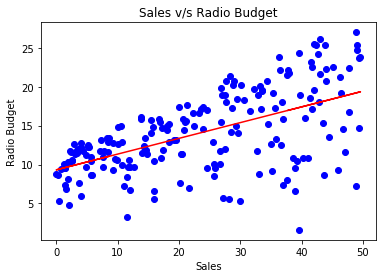

In [0]:
# create an empty linear regression model 
radio_model = LinearRegression()

# to create the model, we use fit(x,y)
radio_model.fit(x,y)

y_pred = radio_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,radio_model.predict(x),color = 'r')
plt.title('Sales v/s Radio Budget')
plt.xlabel('Sales')
plt.ylabel('Radio Budget')
plt.show()


In [0]:
# The coefficients
print('Coefficients: \n', radio_model.coef_)

Coefficients: 
 [[0.20249578]]


## Newspaper Simple Linear model

In [0]:
x = data.iloc[:,2].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

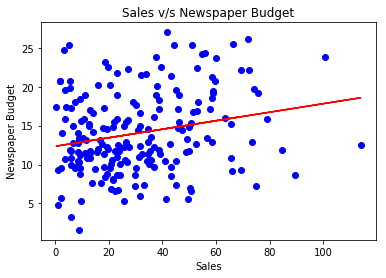

In [0]:
# create an empty linear regression model 
newspaper_model = LinearRegression()

# to create the model, we use fit(x,y)
newspaper_model.fit(x,y)

y_pred = newspaper_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,newspaper_model.predict(x),color = 'r')
plt.title('Sales v/s Newspaper Budget')
plt.xlabel('Sales')
plt.ylabel('Newspaper Budget')
plt.show()


In [0]:
# The coefficients
print('Coefficients: \n', newspaper_model.coef_)

Coefficients: 
 [[0.0546931]]


## Multiple Linear Regression

In [0]:
X = data.iloc[:,[1,2,3]].values
X[1:4]

array([[ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5]])

In [0]:

y = data.iloc[:,4].values
y = y.reshape(-1, 1)
X = X.reshape(-1, 3)

# create an empty linear regression model like below and give it a good variable name
advertising_model = LinearRegression()

# to create the model, we use fit(x,y)
advertising_model.fit(X,y)


print('Intercept: \n', advertising_model.intercept_)
print('Coefficients: \n', advertising_model.coef_)


Intercept: 
 [2.93888937]
Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]


## Training and test samples

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)



Training data: (150, 3) (150, 1)
Test data: (50, 3) (50, 1)


Using a 0.25 test size split our data of 200 items into a training set of 150 observations and three columns, and a test set of 50 observations. 

We can use this to evaluate our model.


### Now we’ll fit the model on the training data:


In [0]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


In [0]:
predictions[0:5]


array([[14.31342846],
       [10.63656656],
       [17.16381457],
       [11.95534871],
       [ 7.91714842]])

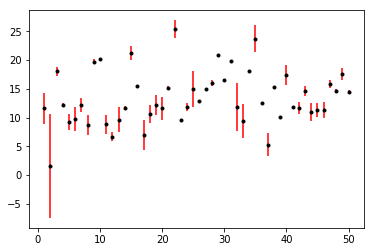

In [0]:
## Plot the errors

plt.errorbar(range(1,51), y_test, yerr=(y_test-predictions), fmt='.k', ecolor="red");



The red lines indicate the error of the prediction from the actual observations. 

Sklearn's LinearRegression provides the R squared score for its models:

In [0]:
print ("Score:", model.score(X_test, y_test))


Score: 0.8263394857156908


This score is quite close to 1, which suggests that our model fits our observations quite well.